In [1]:
# Imports
import pickle
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [1]:
# USER INPUT: Select set and video
SET_ID = "set01"
VIDEO_ID = "video_0001"
frames_dir = "images/"+ SET_ID + "/" + VIDEO_ID
export_dir = "images/"+ SET_ID + "/bboxvid/" + VIDEO_ID

list_of_frames = os.listdir(frames_dir)
nr_of_frames = len(list_of_frames)

# load database file
file = 'data_cache/pie_database.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)
    
dict_items = dict(data).items()
set_nr = data.get(SET_ID)
set_nr.keys()

vid_nr = set_nr.get(VIDEO_ID)

ped_annot = vid_nr.get("ped_annotations") 

#State: The state of the traffic light. The options are red, yellow and green.
frames = []
bboxs = []
states = []

# pedestrian
# Action: Whether the pedestrian is walking or standing
# Gesture: The type of gestures exhibited by the pedestrian. The gestures include
# hand_ack (pedestrian is acknowledging by hand gesture),
# hand_yield (pedestrian is yielding by hand gesture), 
# hand_rightofway (pedestrian is giving right of way by hand gesture), 
# nod, or other.
# Look: Whether pedestrian is looking or not-looking.
# Cross: Whether pedestrian is not-crossing, 
# crossing the path of the ego-vehicle and crossing-irrelevant which indicates that the pedestrian is crossing the road 
# but not in the path of the ego-vehicle.
actions = []
gestures = []
looks = []
crosses = []

# Age: child, adult and senior.
# Gender: male, female. although I would much prefer this to be gender equal. Let's not dial this in?
# Crossing: whether or not or whether it is irrelevant
ages =  []
# genders = [] 
crossings = []
ids = []

for pedestrian in ped_annot.keys():
    frames.append(ped_annot.get(pedestrian).get("frames"))
    bboxs.append(ped_annot.get(pedestrian).get("bbox"))
    states.append(ped_annot.get(pedestrian).get("state"))
    
    actions.append(ped_annot.get(pedestrian).get("behavior").get("action"))
    actions.append(ped_annot.get(pedestrian).get("behavior").get("gesture"))
    looks.append(ped_annot.get(pedestrian).get("behavior").get("look"))
    crosses.append(ped_annot.get(pedestrian).get("behavior").get("look"))
    
    ages.append(ped_annot.get(pedestrian).get("attributes").get("age"))
#     genders.append(ped_annot.get(pedestrian).get("attributes").get("gender"))
    crossings.append(ped_annot.get(pedestrian).get("attributes").get("crossing"))
    ids.append(pedestrian)


In [2]:
# convert from frame number to file name
nr_pedestrians = len(list(frames))
string_frames = np.zeros(nr_pedestrians, dtype=object)

for pedestrian in range(nr_pedestrians):
    pedes_frames = np.zeros(nr_of_frames, dtype=object)
    f_count = 0
    for frame in frames[pedestrian]:
        string_frame = str(frame)
        while len(string_frame) < 5:
            string_frame = '0' + str(string_frame)
        else:
            pedes_frames[f_count] = (str(string_frame) + ".png")
            f_count = f_count+1
    string_frames[pedestrian] = pedes_frames


In [3]:
def export_video_with_bbox(frames, bboxs):
    img_array = np.zeros(nr_of_frames, dtype=object)
    img_dir = frames_dir+'/' + list_of_frames[0]
    init = cv2.imread(img_dir)
    h, w, c = init.shape
    fps=30
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    vid_name = 'out'+ SET_ID + '_' + VIDEO_ID + '.mp4'
    writer = cv2.VideoWriter(export_dir+'/' + vid_name, fourcc, fps, (w, h))
    
    print('Step 1/3: Loading images into frame buffer...')
    for frame in range(nr_of_frames):
        img = cv2.imread(frames_dir + '/' + list_of_frames[frame])
        img_array[frame] = img
        
    print('Step 2/3: Drawing bounding boxes over pedestrians...')
    for pedestrian in range(nr_pedestrians): 
        count = 0
        for imgcount in range(len(img_array)):
            if list_of_frames[imgcount] in string_frames[pedestrian]:
                bbox = bboxs[pedestrian][count]
                identity = ids[pedestrian]
                start_point = (int(bbox[0]), int(bbox[1]))
                end_point = (int(bbox[2]), int(bbox[3]))
                textbox = (int(bbox[0]), int(bbox[1])-10)
                
#                 if looks[pedestrian][count] == 1:
#                     color = (0,255,0)
#                 else:
#                     color = (0,0,255)
#                 thickness = 2
                color = (36,255,12)
                thickness = 2
                
                rect = cv2.rectangle(img_array[imgcount], start_point, end_point, color, thickness)
                cv2.putText(rect, identity, textbox, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                img_array[imgcount] = rect
                count = count + 1
                
    print('Step 3/3: Writing video file...')

    for i in range(len(img_array)):
        writer.write(img_array[i])
    writer.release()
    
    print("Video '" + vid_name + "' exported to " + export_dir + "!")

In [33]:
export_video_with_bbox(frames, bboxs)


Step 1/3: Loading images into frame buffer...
Step 2/3: Drawing bounding boxes over pedestrians...
Step 3/3: Writing video file...
Video 'outset03_video_0019.mp4' exported to images/set03/video_0019!


In [3]:
# load database file
#after first save: choose _annotated!
# file = 'data_cache/pie_database.pkl' 
file = 'data_cache/pie_database_annotated.pkl'

# USER INPUT: Select set and video
SET_ID = "set06"
VIDEO_ID = "video_0008"
frames_dir = "images/"+ SET_ID + "/" + VIDEO_ID
export_dir = "images/"+ SET_ID + "/bboxvid/" + VIDEO_ID

list_of_frames = os.listdir(frames_dir)
nr_of_frames = len(list_of_frames)

with open(file, 'rb') as f:
    data = pickle.load(f)
    
dict_items = dict(data).items()
set_nr = data.get(SET_ID)
set_nr.keys()

vid_nr = set_nr.get(VIDEO_ID)

ped_annot = vid_nr.get("ped_annotations") 

#create new dataset entry for ill-intent list
frames_dir = "images/"+ SET_ID + "/" + VIDEO_ID

list_of_frames = os.listdir(frames_dir)
nr_of_frames = len(list_of_frames)

event_arr = np.zeros(nr_of_frames)

In [205]:
with open(file, 'rb') as f:
    data = pickle.load(f)

pedestrian = "6_8_1920"

#previous clips endings
#enter minute start
mm_end = 16
#enter second start
ss_end = 35
#enter frame start
ff_end = 23


#enter minute start
mm_start = 17
#enter second start
ss_start = 10
#enter frame start
ff_start = 7

#enter minute stop
mm_stop = 17
#enter second stop
ss_stop = 11
#enter frame stop
ff_stop = 27

frame_end = mm_end*1800 + ss_end*30 + ff_end
frame_start = mm_start*1800 + ss_start*30 + ff_start - frame_end
frame_stop = mm_stop*1800 + ss_stop*30 + ff_stop - frame_end



In [206]:
#add event instance
for x in range(frame_start, frame_stop):
    event_arr[x] = 1


In [207]:
# add events to dictionary as ill-intent attribute
    event_list = event_arr.tolist()
    ped_annot.get(pedestrian)["ill-intent"] = event_list
#     output = open('data_cache/pie_database_annotated.pkl', 'wb')
#     pickle.dump(file, output)
    with open('data_cache/pie_database_annotated.pkl', 'wb') as handle:
        pickle.dump(dict(dict_items), handle, protocol = pickle.HIGHEST_PROTOCOL)
        print('saved')

saved


In [11]:
#create dataframe with x = features, y = videos (set_nr*video_nr)
input_file = 'data_cache/pie_database_annotated.pkl' #should contain all annotations of all videos in all sets.
pkl = pd.read_pickle(input_file)
# shape_array = np.arange(972)
# shape_array.reshape(18,54)
# # data_frame = np.array(np.zeros_like(shape_array), dtype=float)
data_frame = []

with open(input_file, 'rb') as f:
    data = pickle.load(f)
dict_items = dict(data).items()

# VIDEO_ID = "video_0008"
# SET_ID = "set06"
# set_nr_data = data.get(SET_ID)

# vid_nr = set_nr_data.get(VIDEO_ID)

# ped_annot = vid_nr.get("ped_annotations")
# ill_intents = vid_nr.get('ill-intent')

In [14]:


# df =  pd.DataFrame(data)
# df.to_csv(r'csv_data.csv')
    
# annot_file = pd.read_pickle(input_file) #pickle to dictionary
video_nr_matrix = [4,3,19,16,2,9]
# row_nr = 0
for set_nr in range(1,7): #range(1,7)
    print("set 0" + str(set_nr))
    SET_ID = "set0" + str(set_nr)
    set_nr_data = data.get(SET_ID)
#     set_nr_data.keys()
    for video_nr in range(1,video_nr_matrix[set_nr-1]+1): # range(1, video_nr_matrix[set_nr-1]+1)

        VIDEO_ID = "video_00" + "{0:0=2d}".format(video_nr)
        frames_dir = "images/"+ SET_ID + "/" + VIDEO_ID
        export_dir = "images/"+ SET_ID + "/bboxvid/" + VIDEO_ID
        
        list_of_frames = os.listdir(frames_dir)
        nr_of_frames = len(list_of_frames)
        
        vid_nr = set_nr_data.get(VIDEO_ID)
        ped_annot = vid_nr.get("ped_annotations") 
        
         #State: The state of the traffic light. The options are red, yellow and green.
        frames = []
        ill_intents = []

        bboxs = []
        states = []

        # pedestrian
        # Action: Whether the pedestrian is walking or standing
        # Gesture: The type of gestures exhibited by the pedestrian. The gestures include
        # hand_ack (pedestrian is acknowledging by hand gesture),
        # hand_yield (pedestrian is yielding by hand gesture), 
        # hand_rightofway (pedestrian is giving right of way by hand gesture), 
        # nod, or other.
        # Look: Whether pedestrian is looking or not-looking.
        # Cross: Whether pedestrian is not-crossing, 
        # crossing the path of the ego-vehicle and crossing-irrelevant which indicates that the pedestrian is crossing the road 
        # but not in the path of the ego-vehicle.
        actions = []
        gestures = []
        looks = []
        crosses = []

        # Age: child, adult and senior.
        # Gender: male, female. although I would much prefer this to be gender equal. Let's not dial this in?
        # Crossing: whether or not or whether it is irrelevant
        ages =  []
        genders = [] 
        crossings = []
        ids = []
        crossing_points = []
        critical_points = []
        exp_start_points = []
        intersections = []
        designateds = []
        traffic_directions = []
        group_sizes = []
        motion_directions = []
        
        for pedestrian in ped_annot.keys():
            if isinstance(ped_annot.get(pedestrian).get("ill-intent"), type(None)):
                ped_annot.get(pedestrian)["ill-intent"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("state"), type(None)):
                ped_annot.get(pedestrian)["state"] = np.zeros(nr_of_frames)
          
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("gender"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["gender"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("age"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["age"] = np.zeros(nr_of_frames)

            if isinstance(ped_annot.get(pedestrian).get("attributes").get("crossing"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["crossing"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("id"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["id"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("crossing_point"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["crossing_point"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("critical_point"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["critical_point"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("exp_start_point"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["exp_start_point"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("intersection"), type(None)):
                ped_annot.get(pedestrian)["intersection"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("designated"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["designated"] = np.zeros(nr_of_frames)
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("traffic_direction"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["traffic_direction"] = np.zeros(nr_of_frames)            
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("motion_direction"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["motion_direction"] = np.zeros(nr_of_frames)         
            if isinstance(ped_annot.get(pedestrian).get("attributes").get("group_size"), type(None)):
                ped_annot.get(pedestrian).get("attributes")["group_size"] = np.zeros(nr_of_frames)
                

       
            frames.append(ped_annot.get(pedestrian).get("frames"))
            ill_intents.append(ped_annot.get(pedestrian).get("ill-intent"))
            bboxs.append(ped_annot.get(pedestrian).get("bbox"))
            states.append(ped_annot.get(pedestrian).get("state"))

            actions.append(ped_annot.get(pedestrian).get("behavior").get("action"))
            gestures.append(ped_annot.get(pedestrian).get("behavior").get("gesture"))
            looks.append(ped_annot.get(pedestrian).get("behavior").get("look"))
            crosses.append(ped_annot.get(pedestrian).get("behavior").get("look"))

            ages.append(ped_annot.get(pedestrian).get("attributes").get("age"))
            genders.append(ped_annot.get(pedestrian).get("attributes").get("gender"))
            crossings.append(ped_annot.get(pedestrian).get("attributes").get("crossing"))
            ids.append(pedestrian)
            crossing_points.append(ped_annot.get(pedestrian).get("attributes").get("crossing_point"))
            critical_points.append(ped_annot.get(pedestrian).get("attributes").get("critical_point"))
            exp_start_points.append(ped_annot.get(pedestrian).get("attributes").get("exp_start_point"))
            intersections.append(ped_annot.get(pedestrian).get("attributes").get("intersection"))
            traffic_directions.append(ped_annot.get(pedestrian).get("attributes").get("traffic_direction"))

            designateds.append(ped_annot.get(pedestrian).get("attributes").get("designated"))
            group_sizes.append(ped_annot.get(pedestrian).get("attributes").get("group_size"))
            motion_directions.append(ped_annot.get(pedestrian).get("attributes").get("motion_direction"))


            for i in range(len(frames)):
                for j in range(len(frames[i])):

                    col_features = [frames[i][j], ill_intents[i][j], bboxs[i][j], states[i][j], actions[i][j], gestures[i][j], looks[i][j], crosses[i][j], ages[i], 
                                    genders[i], crossings[i], ids[i], crossing_points[i], critical_points[i], exp_start_points[i], 
                                    intersections[i], designateds[i], traffic_directions[i], group_sizes[i], 
                                    motion_directions[i][j]]
                    data_frame.append(col_features)

set 01
set 02
set 03
set 04
set 05
set 06


In [15]:
df = pd.DataFrame(data_frame)
df.to_csv('dataFrame_complete.csv', encoding='utf-8')

In [ ]:
#START HERE FOR PARAM TUNING 
#load dataframe
df = pd.read_csv('dataFrame_complete.csv')


In [17]:
# for i in range (100):
#     print(1.0 in ill_intents[i])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


IndexError: list index out of range

In [18]:
# Make dataframe with variables on X with every row Y being a video.
col_names = ['frames','ill_intents', 'bboxs', 'states', 'actions', 'gestures', 'looks', 'crosses', 'ages','genders', 'crossings', 
             'ids', 'crossing_points', 'critical_points', 'exp_start_points', 'intersections', 'designateds', 
             'traffic_directions', 'group_sizes', 'motion_directions']
df = pd.read_csv("dataFrame_complete.csv", names=col_names)
df.head()


,frames,ill_intents,bboxs,states,actions,gestures,looks,crosses,ages,genders,crossings,ids,crossing_points,critical_points,exp_start_points,intersections,designateds,traffic_directions,group_sizes,motion_directions
NaN,0,1.0,2,3.0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19.0
0.0,13937,0.0,"[786.37, 805.0, 796.6, 842.7]",0.0,0,0,0,0,2,2,0,1_1_19,14059,14048,13942,4,[0. 0. 0. ... 0. 0. 0.],1,[0. 0. 0. ... 0. 0. 0.],0.0
1.0,13938,0.0,"[785.06, 808.56, 795.29, 846.25]",0.0,0,0,0,0,2,2,0,1_1_19,14059,14048,13942,4,[0. 0. 0. ... 0. 0. 0.],1,[0. 0. 0. ... 0. 0. 0.],0.0
2.0,13939,0.0,"[784.71, 806.35, 794.94, 844.04]",0.0,0,0,0,0,2,2,0,1_1_19,14059,14048,13942,4,[0. 0. 0. ... 0. 0. 0.],1,[0. 0. 0. ... 0. 0. 0.],0.0
3.0,13940,0.0,"[783.34, 803.42, 793.58, 841.12]",0.0,0,0,0,0,2,2,0,1_1_19,14059,14048,13942,4,[0. 0. 0. ... 0. 0. 0.],1,[0. 0. 0. ... 0. 0. 0.],0.0


In [19]:
feature_cols = ['gestures', 'looks', 'actions', 'ages', 'traffic_directions']

X = df[feature_cols]
y = df.ill_intents  #Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [20]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8456660,       0],
       [   1214,       1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

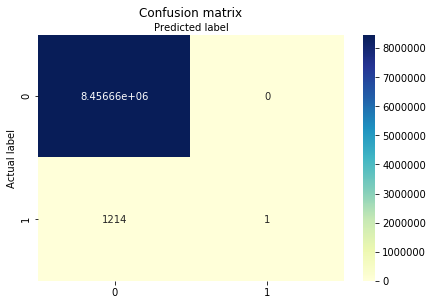

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

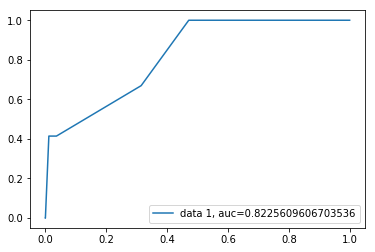

In [23]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()